In [54]:
# DATA downloaded from: https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::california-historical-fire-perimeters/explore?layer=0&location=33.979113%2C-118.013589%2C14.33&showTable=true

In [33]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [41]:
raw_wf = gpd.read_file('../Data/California_Fire_Perimeters_(all)/California_Fire_Perimeters_(all).shp')

# filter Alarm_Date after 2020-12-01 and befpre 2022-12-01
raw_wf["ALARM_DATE"] = pd.to_datetime(raw_wf["ALARM_DATE"])
start = pd.Timestamp("2020-12-01")
end   = pd.Timestamp("2022-12-01")
mask = (raw_wf["ALARM_DATE"] >= start) & (raw_wf["ALARM_DATE"] <= end)
wf = raw_wf.loc[mask].copy()
wf

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,Shape__Are,Shape__Len,geometry
284,285,2022.0,CA,CDF,BDU,AIRPORT,00002479,2022-02-16,2022-02-26,14.0,...,4140.060000,None,None,{7AFEDAC3-F210-4FFC-8F27-99560E4BADF6},None,None,2020.0,2.650813e+07,85420.835215,"MULTIPOLYGON (((-13172722.705 4485904.269, -13..."
285,286,2022.0,CA,CDF,BTU,DENIZ,00009033,2022-05-24,2022-05-24,14.0,...,29.846780,None,None,{FE78908D-7B26-4F0F-8B42-C28B36BADA88},None,None,2020.0,2.023891e+05,2631.420753,"POLYGON ((-13547293.587 4775183.272, -13547306..."
286,287,2022.0,CA,CDF,TGU,RANCHO,00006986,2022-06-13,2022-06-19,14.0,...,589.867100,None,None,{055F1E57-2DFF-4452-B0AB-71B1E553F1C3},None,None,2020.0,4.071594e+06,13299.522011,"POLYGON ((-13631209.037 4867337.769, -13631198..."
287,288,2022.0,CA,CDF,CZU,TOWER,00003536,2022-06-03,2022-06-03,7.0,...,28.684880,None,None,{9C33551B-A0C4-434A-82A7-B38DFE6385A7},None,None,2020.0,1.856030e+05,2034.754555,"POLYGON ((-13625379.000 4533528.000, -13625296..."
288,289,2022.0,CA,CDF,TGU,BURROWS,00007620,2022-06-28,2022-06-29,18.0,...,309.479300,None,None,{43FDB5CA-464E-4066-B928-C68A8F998873},None,None,2020.0,2.120494e+06,7454.125266,"POLYGON ((-13640433.634 4829355.889, -13640424..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1180,2020.0,CA,CDF,BEU,AIRLINE,00006361,2020-12-25,2020-12-25,7.0,...,62.407830,Brush or brush-and-grass mixture fire\r\n,None,{F79A02CF-AB98-4D99-B171-5EBEB313E807},None,None,2020.0,3.888821e+05,5360.407905,"MULTIPOLYGON (((-13462825.455 4330793.838, -13..."
1256,1257,2020.0,CA,USF,BDF,PITMAN,00020795,2020-12-26,2020-12-26,2.0,...,39.666260,None,None,{F1C60517-39A2-45E3-97CB-8A750626CF94},None,None,2020.0,2.352990e+05,3027.958161,"POLYGON ((-13072273.182 4057123.350, -13072282..."
1331,1332,2020.0,CA,DOD,MCP,CREEK 5,00020846,2021-12-30,2021-12-31,14.0,...,3052.173000,None,None,None,None,None,2020.0,1.776124e+07,30411.794217,"POLYGON ((-13054788.108 3949088.172, -13054776..."
1415,1416,2020.0,CA,CCO,LAC,CANYON,00377420,2020-12-13,2020-12-13,11.0,...,7.268880,None,None,{8DACD89E-4CEF-4A44-AF69-675C220A78DD},None,None,2020.0,4.285496e+04,1243.215993,"POLYGON ((-13122785.881 4021675.818, -13122765..."


In [47]:
type(fires_la)

geopandas.geodataframe.GeoDataFrame

Total fire records: 55


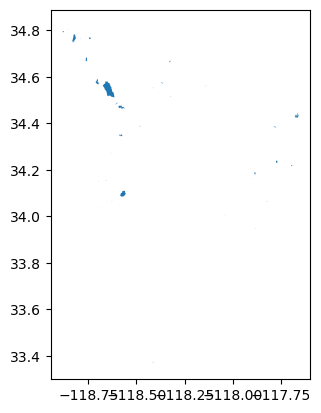

In [49]:
la_county_gdf = gpd.read_file("../Data/LA_County_Boundary/LA_County_Boundary.shp")
la_county_gdf = la_county_gdf.to_crs(epsg=4326) 

if wf.crs != la_county_gdf.crs:
    wf = wf.to_crs(la_county_gdf.crs)

fires_la = gpd.clip(wf, la_county_gdf)
fires_la.plot()
fires_la['ALARM_DATE'] = fires_la['ALARM_DATE'].dt.date.astype(str)
print(f"Total fire records: {len(fires_la)}")
fires_la.to_file("../Data/Output/fires_2020_2022_LA.shp")